In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read visadataset
# Read bank.csv
file_path=r"C:\Users\USER\Documents\Gen_ai\Data science and AI\Data File\Visadataset.csv"
visa_df=pd.read_csv(file_path)


cat=visa_df.select_dtypes(include='object').columns
num=visa_df.select_dtypes(exclude='object').columns


In [3]:
cat

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [4]:
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [5]:
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [7]:
visa_df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

- there are total 25480 applicants are there

- In that 25480 applicants 17018 applicants got the visa

- 8462 applicants did not got the visa

- also there are 16861 applicants are applied for visa from Asia

- we want to know how many pplicants from asia got certified

- And how many applicants from asia got denied

In [10]:
#step-1:select the continent data
# step-2 : continent data=='Asia' it is con1
# step-3 : select the case status data
# step-4 : case status data=='certified' is con2
# step-5 : con=con1&con2
# step-6 : apply main df on con get the len


In [6]:

con1=visa_df['continent']=='Asia'
con2=visa_df['case_status']=='Certified'
con3=con1 & con2
len(visa_df[con3])

11012

In [7]:
# from different continents how many people are ccertified
lables=visa_df['continent'].unique()
for i in lables:
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Certified'
    con3=con1&con2
    print(len(visa_df[con3]))

11012
397
2037
2957
493
122


In [8]:
lables=visa_df['continent'].unique()
cert_count=[]
denied_count=[]
for i in lables:
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Certified'
    con3=visa_df['case_status']=='Denied'
    cert_con=con1&con2
    den_con=con1 & con3
    cert_count.append(len(visa_df[cert_con]))
    denied_count.append(len(visa_df[den_con]))
cols=sorted(visa_df['case_status'].unique())
print(cols)
pd.DataFrame(zip(cert_count,denied_count),columns=cols,index=lables)
# this is the bivariate analysis one column with another column

['Certified', 'Denied']


,Certified,Denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


**Cross tab**

In [9]:
#pd.crosstab(<index>,<columns>)
col1=visa_df['continent']
col2=visa_df['case_status']
r1=pd.crosstab(col1,col2)
r1

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='continent'>

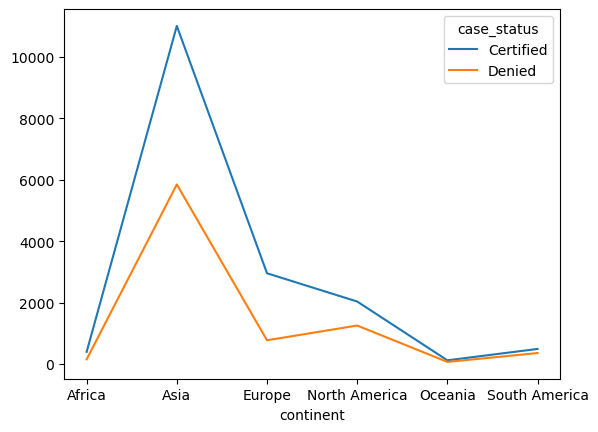

In [10]:
r1.plot()

<Axes: xlabel='continent'>

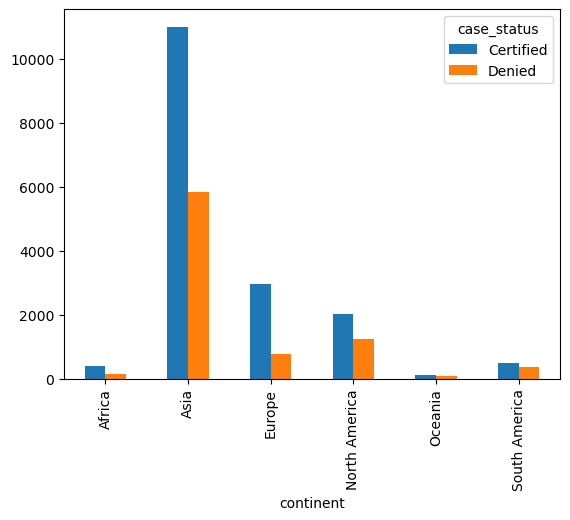

In [11]:
r1.plot(kind='bar')

**case_satus-continent-education_of_employee**

In [ ]:
# from asia there 16k applicanta applied for visa
# in that 11k+ people got certified
# in that 11k people different eucation appicants are avilable
# we want those information

In [12]:
col1=visa_df['continent']
col2=visa_df['case_status']
col3=visa_df['education_of_employee']
cols=[col2,col3]
r2=pd.crosstab(col1,cols)
r2

case_status            Certified                                    Denied  \
education_of_employee Bachelor's Doctorate High School Master's Bachelor's   
continent                                                                    
Africa                        81        43          23      250         62   
Asia                        4407       780         676     5149       2761   
Europe                      1040       788         162      967        259   
North America                641       207         210      979        584   
Oceania                       38        19          19       46         28   
South America                160        75          74      184        173   

case_status                                           
education_of_employee Doctorate High School Master's  
continent                                             
Africa                       11          43       38  
Asia                        143        1614     1331  
Europe                       58         328      130  
North America                51         191      429  
Oceania                       3          17       22  
South America                14          63      109

<Axes: xlabel='continent'>

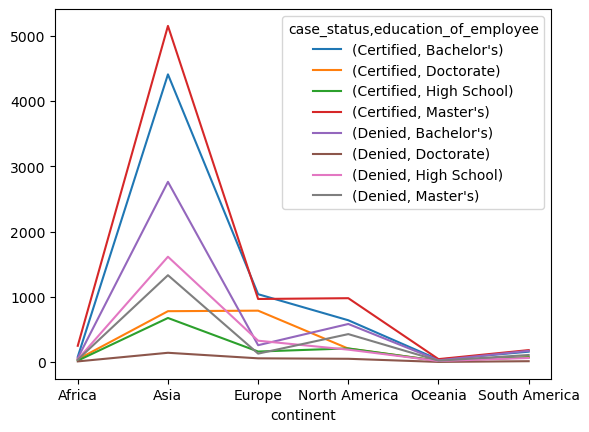

In [13]:
r2.plot()

<Axes: xlabel='continent'>

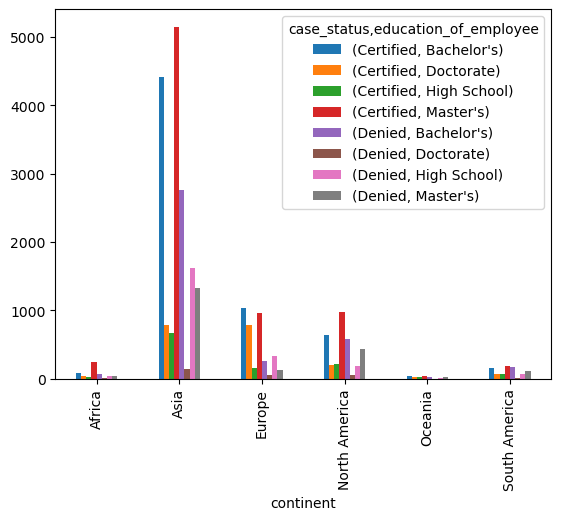

In [14]:
r2.plot(kind='bar')

**group by**#in pandas

In [15]:
visa_df['education_of_employee'].value_counts()

education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64

In [ ]:
visa_df['prevailing_wage']
# wages are numerical values
# 25480 applicants are available
# different applicants having the different wages

In [16]:
list(visa_df.groupby('education_of_employee'))

[("Bachelor's",
           case_id      continent education_of_employee has_job_experience  \
  2         EZYV03           Asia            Bachelor's                  N   
  3         EZYV04           Asia            Bachelor's                  N   
  6         EZYV07           Asia            Bachelor's                  N   
  7         EZYV08  North America            Bachelor's                  Y   
  8         EZYV09           Asia            Bachelor's                  N   
  ...          ...            ...                   ...                ...   
  25466  EZYV25467         Europe            Bachelor's                  Y   
  25468  EZYV25469           Asia            Bachelor's                  N   
  25473  EZYV25474           Asia            Bachelor's                  Y   
  25475  EZYV25476           Asia            Bachelor's                  Y   
  25479  EZYV25480           Asia            Bachelor's                  Y   
  
        requires_job_training  no_of_employee

In [17]:
visa_df.groupby('education_of_employee').count()

,case_id,continent,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
education_of_employee,,,,,,,,,,,
Bachelor's,10234,10234,10234,10234,10234,10234,10234,10234,10234,10234,10234
Doctorate,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192
High School,3420,3420,3420,3420,3420,3420,3420,3420,3420,3420,3420
Master's,9634,9634,9634,9634,9634,9634,9634,9634,9634,9634,9634


In [18]:
visa_df.groupby('education_of_employee').size()

education_of_employee
Bachelor's     10234
Doctorate       2192
High School     3420
Master's        9634
dtype: int64

In [19]:
# based on group by select an another column
visa_df.groupby('education_of_employee')['prevailing_wage']

In [20]:
visa_df['prevailing_wage'].mean()
# mean wage of all 24580 observations
# Bachelor's,doctorate,HS,Masters

np.float64(74455.81459209183)

In [21]:
visa_df[visa_df['education_of_employee']=="Bachelor's"]['prevailing_wage'].mean()

np.float64(73405.44373547)

In [22]:
visa_df.groupby('education_of_employee')['prevailing_wage'].mean()

education_of_employee
Bachelor's     73405.443735
Doctorate      64561.076657
High School    71582.147756
Master's       78843.057843
Name: prevailing_wage, dtype: float64

In [23]:
visa_df.groupby('continent').size()

continent
Africa             551
Asia             16861
Europe            3732
North America     3292
Oceania            192
South America      852
dtype: int64

In [24]:
# i want to know min wage of the asia ppl
visa_df['prevailing_wage'].min()
con=visa_df['continent']=='Asia'
new_df=visa_df[con]
new_df['prevailing_wage'].min()

3.3188

In [25]:
visa_df.groupby('continent')['prevailing_wage'].min()

continent
Africa           32.9286
Asia              3.3188
Europe            9.1753
North America     2.1367
Oceania          24.4888
South America     3.0031
Name: prevailing_wage, dtype: float64

**class 10-12-25**

- we have **continent and case status**

- we have seen three variable **continent, case status and Education of employee**

- we also done similar anlysis using group by

- only categorical column analysis completed

- only numerical columns analysis completed

- also Bi variate and multivariate analysis also completd

- Now we need to perform Two numerical column analysis

    - This will give between two columns which are numerical in nature

    - so we can perform **corelation matrix** to get the relationship

    - also we can need to perform **scatter plots** to visualize the relation

**plt.scatter**

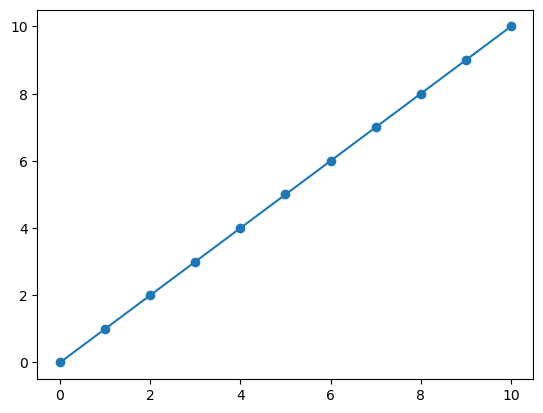

In [26]:
x=range(0,11)
y=range(0,11)
plt.scatter(x,y)
plt.plot(x,y)

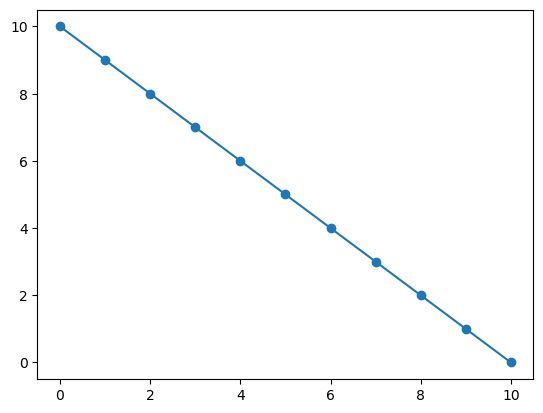

In [27]:
x=range(0,11) # 0 to 10
y=range(10,-1,-1) # 10 to -1+1=0
plt.scatter(x,y)
plt.plot(x,y)

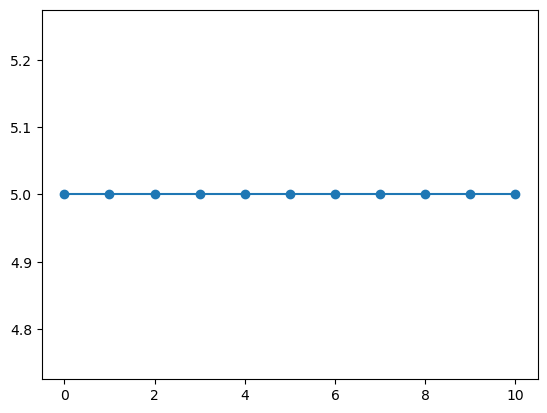

In [29]:
x=range(0,11) # 0 to 10
y=[5 for i in range(0,11)] # 10 to -1+1=0
plt.scatter(x,y)
plt.plot(x,y)

In [30]:
cat

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [31]:
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [35]:
visa_df.corr(numeric_only=True)
# could not convert string to float: 'EZYV01'

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


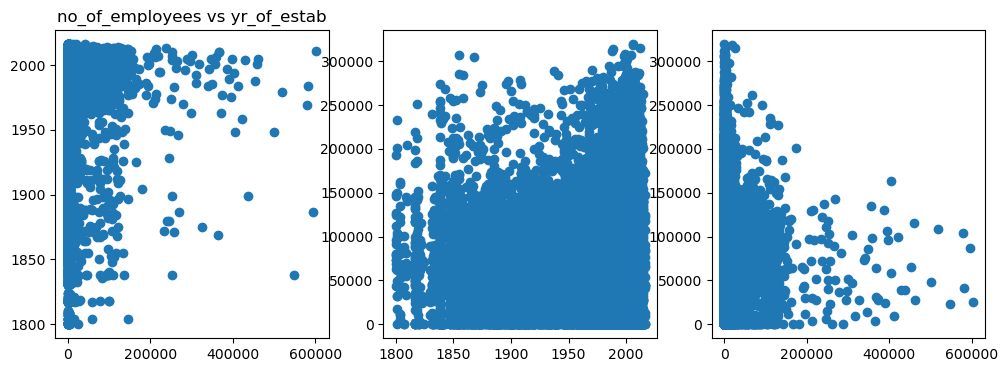

In [44]:
col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
col3=visa_df['prevailing_wage']
plt.figure(figsize=(12,4))
plt.subplot(1,3,1).scatter(col1,col2)
plt.title('no_of_employees vs yr_of_estab')
plt.subplot(1,3,2).scatter(col2,col3)
plt.subplot(1,3,3).scatter(col1,col3)

In [ ]:
# winequality dataset
# load the dataset
# perform the correlation

In [46]:
file_path=r'C:\Users\USER\Documents\Gen_ai\Data science and AI\Data File\winequality_red.csv'
wine_df=pd.read_csv(file_path)
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [57]:
wine_df_corr=wine_df.corr(numeric_only=True)
wine_df_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [52]:
visa_corr=visa_df.corr(numeric_only=True)
visa_corr

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


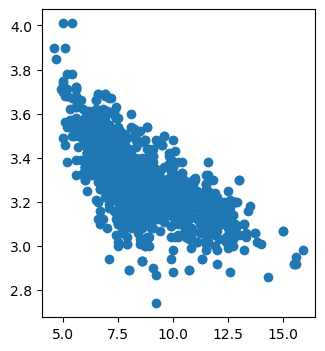

In [49]:
col1=wine_df['fixed acidity']
col2=wine_df['pH']
plt.figure(figsize=(12,4))
plt.subplot(1,3,1).scatter(col1,col2)

**Heat map**

- Any matrix values we can visualize using a heat map

- Heat map will provide colors for different values

- Heat map also provides colors bar which indicates, the color and its value

- For example the values range from 0.8 to 1 display as **blue color**

- so we no need to check values, we can directly see the blue color

- so immediately we can sence blue color means highest values which is 0.8 to 1

- heat map available in **sea born**

<Axes: >

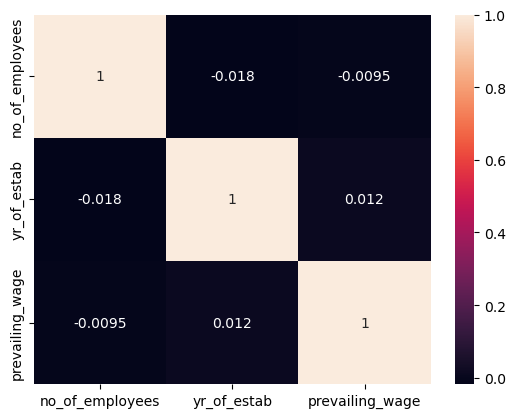

In [56]:
visa_corr=visa_df.corr(numeric_only=True)
sns.heatmap(visa_corr,annot=True)

<Axes: >

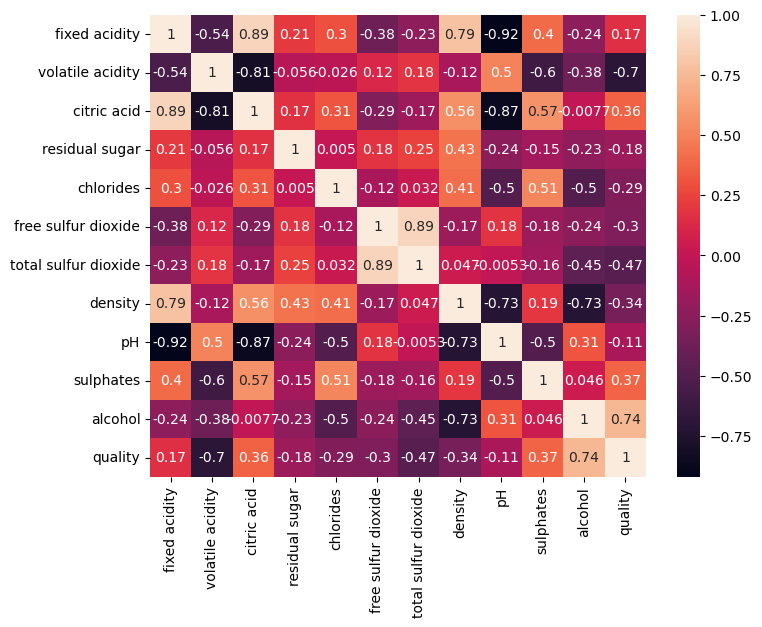

In [58]:
wine_df_corr=wine_df_corr.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(wine_df_corr,annot=True)

In [59]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

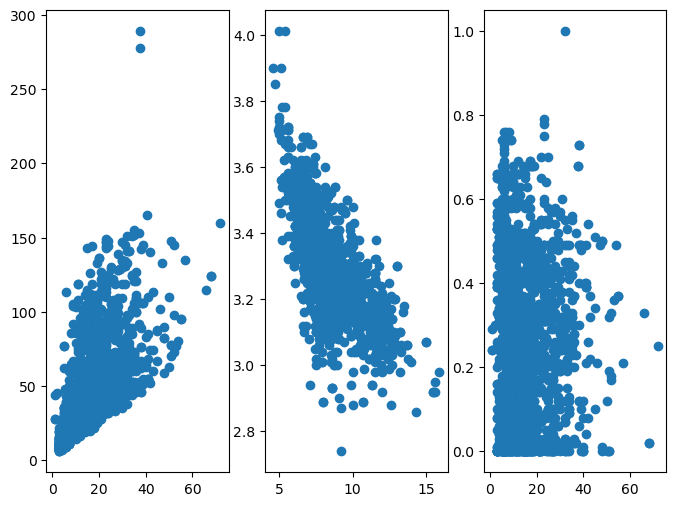

In [60]:
col1=wine_df['free sulfur dioxide']
col2=wine_df['total sulfur dioxide']
col3=wine_df['fixed acidity']
col4=wine_df['pH']
col5=wine_df['citric acid']
plt.figure(figsize=(8,6))
plt.subplot(1,3,1).scatter(col1,col2)
plt.subplot(1,3,2).scatter(col3,col4)
plt.subplot(1,3,3).scatter(col1,col5)